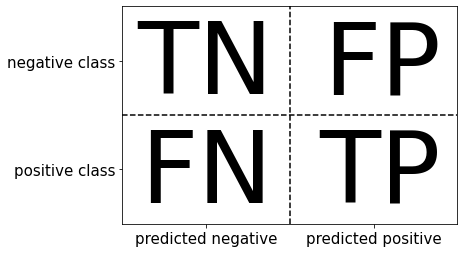

In [1]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [2]:
!pip install torch cuda #amd와 nvidia의 두 그래픽카드회사

ERROR: Invalid requirement: '#amd와'


In [3]:
import torch

In [5]:
torch.__version__

'1.9.0+cpu'

In [8]:
data = [[1,2],[3,4]]

In [9]:
np_data = np.array(data)

In [10]:
data

[[1, 2], [3, 4]]

In [11]:
np_data #행과열이 잘 잡혀있음 : numpy데이터

array([[1, 2],
       [3, 4]])

In [12]:
x_data = torch.tensor(data)

In [13]:
x_data

tensor([[1, 2],
        [3, 4]])

In [15]:
x_data_f = torch.FloatTensor(data)
x_data_f

tensor([[1., 2.],
        [3., 4.]])

In [16]:
print(x_data_f.dim()) #2차원을 의미

2


In [17]:
print(x_data_f.shape)

torch.Size([2, 2])


In [18]:
print(x_data_f.size())

torch.Size([2, 2])


In [19]:
x_data_f[0]

tensor([1., 2.])

In [20]:
x_data_f[0][1] # 2.를 찍기 위해서

tensor(2.)

In [21]:
x_data_f[0][:]

tensor([1., 2.])

In [22]:
t1 = torch.FloatTensor([[1,3]])
t2 = torch.FloatTensor([[2,4]]) 
print(t1+t2) #numpy랑 비슷한 모습

tensor([[3., 7.]])


In [23]:
x_data_f.mean() #1,2,3,4의 평균

tensor(2.5000)

In [24]:
x_data_f.mean(dim=0) #1과3, 2와4의 평균

tensor([2., 3.])

In [25]:
x_data_f.mean(dim=1) #1과2, 3과4의 평균

tensor([1.5000, 3.5000])

In [26]:
t1 = torch.FloatTensor([[1,3]])
t2 = torch.FloatTensor([[2,4]]) 

In [27]:
torch.cat([t1,t2],dim=0)

tensor([[1., 3.],
        [2., 4.]])

In [28]:
torch.cat([t1,t2],dim=1)

tensor([[1., 3., 2., 4.]])

In [31]:
t3 = torch.FloatTensor([[5,6]]) 
t4 = torch.stack([t1,t2,t3]) #리스트 형태로 쌓고싶은것을 리스트로 담아주면 합쳐준다
t4

tensor([[[1., 3.]],

        [[2., 4.]],

        [[5., 6.]]])

In [32]:
torch.ones_like(t4)

tensor([[[1., 1.]],

        [[1., 1.]],

        [[1., 1.]]])

In [33]:
torch.zeros_like(t4)

tensor([[[0., 0.]],

        [[0., 0.]],

        [[0., 0.]]])

In [34]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]]) #dataset을 얻음

In [ ]:
# 가설 설정
# Y = W*x + b (직선의 방정식을 따를 것이다)
# 기존 머신러닝 : MSE평균제곱오차였으나 
# cost function(비용함수) = loss function(손실함수) = error function(오차함수)
# 옵티마이저 : 기울기가 0인 곳을 꼭짓점이라고 인식(최적의 점)
# 경사하강법(Gradient Descent) : 옵티마이저가 하는 일 (Ex.머신러닝에서는 fit)

In [35]:
print(X_train) #2차원 배열로 들어감
print(X_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [36]:
print(y_train) #2차원 배열로 들어감
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [41]:
W = torch.zeros(1,requires_grad = True) # 모델 초기화
print(W)

tensor([0.], requires_grad=True)


In [42]:
b = torch.zeros(1,requires_grad = True)
print(b)

tensor([0.], requires_grad=True)


In [43]:
hypothesis = X_train*W+b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [44]:
cost = torch.mean((hypothesis-y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [46]:
import torch.optim as optim
optimizer = optim.SGD([W,b], lr=0.01)

In [47]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [57]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]]) # 데이터셋 만들기

W = torch.zeros(1,requires_grad = True) # 기울기를 0으로 만들어놓기
b = torch.zeros(1,requires_grad = True) # 절편을 0으로 만들어놓기

optimizer = optim.SGD([W,b], lr=0.001) # learning rate를 조절(짧게짧게 가서 더 자세히 보기)
nb_epochs = 2000
list_cost = []

for epoch in range(nb_epochs):
    hypothesis = X_train*W+b #현재상태를 체크(가설)
    cost = torch.mean((hypothesis-y_train)**2) # mean : 평균 / **2 : 제곱 / hypothesis-y_train : 오차
    
    optimizer.zero_grad() #위에서 설정한 W와 b를 바꿔줌
    cost.backward()
    optimizer.step() #단계적으로 실행
    
    if epoch % 200 == 0 :
        #list_cost.append(cost.item())
        print('Epoch{:4d}/{} W:{:.3f}, b:{:.3f} cost:{:.5f}'.format(epoch, nb_epochs, W.item(),b.item(),cost.item()))

#print(len(list_cost))        
#plt.plot(range(100), list_cost)
#plt.show()

Epoch   0/2000 W:0.019, b:0.008 cost:18.66667
Epoch 200/2000 W:1.513, b:0.624 cost:0.28531
Epoch 400/2000 W:1.686, b:0.661 cost:0.06679
Epoch 600/2000 W:1.717, b:0.637 cost:0.05845
Epoch 800/2000 W:1.732, b:0.608 cost:0.05306
Epoch1000/2000 W:1.745, b:0.579 cost:0.04820
Epoch1200/2000 W:1.757, b:0.552 cost:0.04378
Epoch1400/2000 W:1.768, b:0.526 cost:0.03976
Epoch1600/2000 W:1.779, b:0.502 cost:0.03612
Epoch1800/2000 W:1.790, b:0.478 cost:0.03281


In [ ]:
# 가설 설정 : x가 3개인 다변량 회귀
# y = W1*x1 + W2*x2 + W3*x3 + b

In [63]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

X1_train = torch.FloatTensor([[73],[93],[89],[96],[73]])
X2_train = torch.FloatTensor([[80],[88],[91],[98],[66]])
X3_train = torch.FloatTensor([[75],[93],[90],[100],[70]])

y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

W1 = torch.zeros(1,requires_grad = True) # 변수 : 우리가 찾아야 하는 숫자 
W2 = torch.zeros(1,requires_grad = True)
W3 = torch.zeros(1,requires_grad = True)
b = torch.zeros(1,requires_grad = True)

optimizer = optim.SGD([W1,W2,W3,b], lr=0.000001) #learning rate를 잘 찾는 것이 중요
nb_epochs = 200000 # 총 epochs : 몇 개 할 것인지

for epoch in range(nb_epochs):
    hypothesis = X1_train*W1+X2_train*W2+X3_train*W3+b #predict값을 추정
    cost = torch.mean((hypothesis-y_train)**2) 
    
    optimizer.zero_grad() 
    cost.backward()
    optimizer.step() 
    
    if epoch % 2000 == 0 :  
        print('Epoch{:4d}/{} W1:{:.3f},W2:{:.3f},W3:{:.3f}, b:{:.3f} cost:{:.5f}'.format(epoch, nb_epochs, W1.item(),W2.item(),W3.item(),b.item(),cost.item()))

Epoch   0/200000 W1:0.029,W2:0.029,W3:0.030, b:0.000 cost:29661.80078
Epoch2000/200000 W1:0.679,W2:0.655,W3:0.677, b:0.008 cost:1.49766
Epoch4000/200000 W1:0.689,W2:0.644,W3:0.678, b:0.008 cost:1.37586
Epoch6000/200000 W1:0.699,W2:0.633,W3:0.679, b:0.009 cost:1.26640
Epoch8000/200000 W1:0.709,W2:0.622,W3:0.679, b:0.009 cost:1.16804
Epoch10000/200000 W1:0.718,W2:0.613,W3:0.680, b:0.009 cost:1.07964
Epoch12000/200000 W1:0.726,W2:0.603,W3:0.681, b:0.010 cost:1.00016
Epoch14000/200000 W1:0.735,W2:0.595,W3:0.681, b:0.010 cost:0.92873
Epoch16000/200000 W1:0.742,W2:0.587,W3:0.682, b:0.010 cost:0.86448
Epoch18000/200000 W1:0.750,W2:0.579,W3:0.682, b:0.010 cost:0.80670
Epoch20000/200000 W1:0.757,W2:0.571,W3:0.682, b:0.011 cost:0.75468
Epoch22000/200000 W1:0.764,W2:0.565,W3:0.682, b:0.011 cost:0.70790
Epoch24000/200000 W1:0.770,W2:0.558,W3:0.682, b:0.011 cost:0.66579
Epoch26000/200000 W1:0.776,W2:0.552,W3:0.682, b:0.011 cost:0.62786
Epoch28000/200000 W1:0.782,W2:0.546,W3:0.682, b:0.012 cost:0.59

In [78]:
import torch.nn as nn
import torch.nn.functional as F

X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])
model = nn.Linear(1, 1) # (input_dim=1, output_dim=1) 간단한 머신러닝 장치
# print(list(model.parameters())) # tensor([[-0.7252]] : W자리 / tensor([-0.9357] : b자리

optimizer = optim.SGD(model.parameters(), lr=0.01) 

nb_epochs = 2000
for epoch in range(nb_epochs+1):
    prediction = model(X_train)
    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad() 
    cost.backward()
    optimizer.step() 
    
    if epoch % 100 == 0 :
        print('Epoch{:4d}/{} loss:{:.5f}'.format(epoch, nb_epochs, cost.item()))

Epoch   0/2000 loss:5.78253
Epoch 100/2000 loss:0.03754
Epoch 200/2000 loss:0.02320
Epoch 300/2000 loss:0.01434
Epoch 400/2000 loss:0.00886
Epoch 500/2000 loss:0.00547
Epoch 600/2000 loss:0.00338
Epoch 700/2000 loss:0.00209
Epoch 800/2000 loss:0.00129
Epoch 900/2000 loss:0.00080
Epoch1000/2000 loss:0.00049
Epoch1100/2000 loss:0.00030
Epoch1200/2000 loss:0.00019
Epoch1300/2000 loss:0.00012
Epoch1400/2000 loss:0.00007
Epoch1500/2000 loss:0.00004
Epoch1600/2000 loss:0.00003
Epoch1700/2000 loss:0.00002
Epoch1800/2000 loss:0.00001
Epoch1900/2000 loss:0.00001
Epoch2000/2000 loss:0.00000


In [79]:
new_input = torch.FloatTensor([[1.5]])
pred_y = model(new_input)
pred_y

tensor([[3.0018]], grad_fn=<AddmmBackward>)